In [1]:
import pandas as pd
import numpy as np

import requests
from requests import get
from bs4 import BeautifulSoup

from time import sleep
from random import randint
import pandas as pd

In [2]:
titles = []
years = []
time = []
imdb_ratings = []
metascores = []
votes = []
us_gross = []
movie_name=[]
dir_nam=[]
certificate=[]
star1=[]
star2=[]
star3=[]
start4=[]
popularity=[]
genre=[]

In [3]:
headers = {'Accept-Language': 'en-US, en;q=0.5'}


# Storing each of the urls of 50 movies 
    # Getting the contents from the each url
page = requests.get('https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f11158cc-b50b-4c4d-b0a2-40b32863395b&pf_rd_r=XZ8X52H1R40B7KG5SNZ9&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1', headers=headers)
soup = BeautifulSoup(page.text, 'html.parser')
pages = np.arange(1, 1001, 50)

# Storing each of the urls of 50 movies 
for page in pages:
    # Getting the contents from the each url
    page = requests.get('https://www.imdb.com/search/title/?groups=top_1000&start=' + str(page) + '&ref_=adv_nxt', headers=headers)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # Aiming the part of the html we want to get the information from
    movie_div = soup.find_all('div', class_='lister-item mode-advanced')
    
    # Controling the loop’s rate by pausing the execution of the loop for a specified amount of time
    # Waiting time between requests for a number between 2-10 seconds
    sleep(randint(2,10))
    
    for container in movie_div:
        # Scraping the movie's name
        name = container.h3.a.text
        titles.append(name)
        
        # Scraping the movie's year
        year = container.h3.find('span', class_='lister-item-year').text
        years.append(year)
        
        # Scraping the movie's length
        runtime = container.find('span', class_='runtime').text if container.p.find('span', class_='runtime') else '-'
        time.append(runtime)
        
        # Scraping the rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
        
        # Scraping the metascore
        m_score = container.find('span', class_='metascore').text if container.find('span', class_='metascore') else '-'
        metascores.append(m_score)
        
        # Scraping votes and gross earnings
        nv = container.find_all('span', attrs={'name':'nv'})
        vote = nv[0].text
        votes.append(vote)
        grosses = nv[1].text if len(nv) > 1 else '-'
        us_gross.append(grosses)
        
        #Scraping the movie
        movv=pd.read_csv('Data1.csv')
        movie_name=movv['MovieName']
        
        #Scraping the director
        dir_nam=movv['DirectorName']
        
        movv=pd.read_csv('Data2.csv')
        certificate=movv['Certificate']
        
        star1=movv['Star1']
        
        star2=movv['Star2']
    
        star3=movv['Star3']
        
        star4=movv['Star4']
    
        popularity=movv['popularity']

        genre=movv['Genre']

movies = pd.DataFrame({'movie':titles,
                       'year':years,
                       'time_minute':time,
                       'imdb_rating':imdb_ratings,
                       'metascore':metascores,
                       'vote':votes,
                       'gross_earning':us_gross,
                       'Movie Name':movie_name,
                       'Director Name':dir_nam,
                       'Certificate':certificate,
                       'star1':star1,
                       'star2':star2,
                       'star3':star3,
                       'star4':star4,
                       'Popularity':popularity,
                       'Genre':genre})

In [4]:
  import sqlite3
 
connection_obj = sqlite3.connect('Movietable.db')
 
cursor_obj = connection_obj.cursor()
 
# ======= TABLE 1
 
# Creating table

table1 = """ CREATE TABLE Table11 (
            SNO INT(255) NOT NULL,
            MovieName VARCHAR(50) NOT NULL,
            Year VARCHAR(150) NOT NULL,
            Duration VARCHAR(50) NOT NULL,
            ratings VARCHAR(150) NOT NULL,
            MetaScore VARCHAR(150) NOT NULL,
           DirectorName VARCHAR(50) NOT NULL
        )"""


cursor_obj.execute(table1)

import pandas as pd
# Load CSV data into Pandas DataFrame
student = pd.read_csv('Data1.csv')
 
# Write the data to a sqlite db table
student.to_sql('Table1', connection_obj, if_exists='replace', index=False)
   
# Run select sql query
cursor_obj.execute('select * from Table1')
 
# Fetch all records
# as list of tuples
records = cursor_obj.fetchall()

print("----------------------------------------")
print("Table 1 created ")
print("----------------------------------------")
print() 
# Display result 
for row in records:
    # show row
    print(row)


# ------------------- TABLE 2

# ============


table2 = """ CREATE TABLE Table12 (
            MovieName VARCHAR(50) NOT NULL,
            Certification VARCHAR(50) NOT NULL,
            Star1 VARCHAR(50) NOT NULL,
            Star2 VARCHAR(50) NOT NULL,
            Star3 VARCHAR(50) NOT NULL,
            Star4 VARCHAR(50) NOT NULL,
            Votes VARCHAR(50) NOT NULL,
            GrossCollection VARCHAR(50) NOT NULL,
            Popularity VARCHAR(50) NOT NULL,
            Genre VARCHAR(50) NOT NULL
        )"""
 
cursor_obj.execute(table2)

tab2 = pd.read_csv('Data2.csv')
 
# Write the data to a sqlite db table
tab2.to_sql('Table2', connection_obj, if_exists='replace', index=False)
   
# Run select sql query
cursor_obj.execute('select * from Table2')
 
# Fetch all records
# as list of tuples
records = cursor_obj.fetchall()

print("----------------------------------------")
print("Table 2 created ")
print("----------------------------------------")
print()  
# Display result 
for row in records:
    # show row
    print(row)


# -----------------------------------------------------------------
# -----------------------------------------------------------------

# === TABLE 1

print("---------------------------------------------------------------------------------------")
print("1)  Display all the details of movies created by directors Christopher and Matt Reeves.")
print("---------------------------------------------------------------------------------------")
print()

cursor_obj.execute("SELECT * FROM Table1 WHERE DirectorName = 'Christopher' ")



rec=cursor_obj.fetchall()


for director in rec:
    # show rowp
    print()
    print(director)

cursor_obj.execute("SELECT * FROM Table1 WHERE DirectorName = 'Matt Reeves'")

rec1=cursor_obj.fetchall()


for director1 in rec1:
    print()
    print(director1)

# ========================================================================================= 3 
   
print("------------------------------------------------------------------------")
print("2) Display all details of movies with ratings above 7 in ascending order")
print("-------------------------------------------------------------------------")
   
 
cursor_obj.execute("SELECT * FROM Table1 ORDER BY Rating > 7 ASC")
   
rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director) 
    
    
# ========================================================================================= 3 
    
print("------------------------------------------------------------------------")
print("3) Display all the details of movies with a duration of 140 minutes to 190 minutes.")
print("-------------------------------------------------------------------------")  
    
    
cursor_obj.execute( "SELECT * FROM Table1 WHERE Duration > 140 AND Duration <= 190")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director) 
    
# ========================================================================================= 3 
   
print("-----------------------------------------------")
print("4) Display all movie names in descending order")
print("------------------------------------------------")
   
    
cursor_obj.execute("SELECT * FROM Table1 ORDER BY MovieName DESC")
   
    

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)      
    
    
# ========================================================================================= 3 

print("---------------------------------------------------------------------")
print("5) Display movie name starts with ‘P’ and their rating is greater than 7")    
print("-----------------------------------------------------------------------")
    
cursor_obj.execute("SELECT * FROM Table1 WHERE MovieName Like'P%' and Rating > 7")
   
    

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)    
            
    
    
# -------------------------------------------------------------------------
# -------------------------------------------------------------------------

# === TABLE 2

print("-----------------------------------------------------------------------")
print("1)  Display all movie names with start Arnold Schwarzenegger in ascending order.")
print("-----------------------------------------------------------------------")

cursor_obj.execute("SELECT * FROM Table2 ORDER BY MovieName = 'Star Trek' ASC")
   
    
rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)       
    
    
# cursor = connection.execute("SELECT * FROM customer_address LIMIT 4")
    
    
print("-----------------------------------------------------------------------")
print("2)  Display all details of the movie with the highest number of votes.")
print("-----------------------------------------------------------------------")
    
cursor_obj.execute("SELECT max(Votes) from Table2")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)     
    

print("-----------------------------------------------------------------------")
print("3) Display movie names with gross collections in descending order.")
print("-----------------------------------------------------------------------")


cursor_obj.execute("SELECT MovieName , Gross FROM Table2 ORDER BY MovieName DESC")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)     
    
    
print("-----------------------------------------------------------------------")
print("4) Display the gross collection of movies with the star Arnold..")
print("-----------------------------------------------------------------------")


cursor_obj.execute("SELECT Gross FROM Table2 ORDER BY MovieName = 'A Star Is Born'")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)     
        

print("-----------------------------------------------------------------------")
print("5) Display all details of movies with comedy and action genres.")
print("-----------------------------------------------------------------------")


cursor_obj.execute("SELECT Genre FROM Table2 ORDER BY Genre = 'Comedy' AND 'Action'")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)     
    
    
# ========================================================================================= 3 
    
    # --------------------- MAKE QUERIES ----------------------------
    
print("-----------------------------------------------------------------------")
print("1) Display all details from both tables where movie names are the same.")
print("-----------------------------------------------------------------------")
    
 
cursor_obj.execute("select * from Table1, Table2  where Table1.MovieName = Table2.MovieName; ")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)     
    
    
# print("----------------------------------------------------------------------------------")
# print("2) Display all movie names, Director, ratings, and gross collection where the genre is action..")
# print("--------------------------------------------------------------------------------------")
    
 
# cursor_obj.execute("SELECT MovieName, FROM Table2 ORDER BY Genre = 'Comedy' AND 'Action'")

# rec1=cursor_obj.fetchall()


# for director in rec1:
#     print()
#     print(director)     
        
    
    
    
    
    
    
    # ------------------------------------------------------------
    
    
print("------------------------------------------------------------------------------")
print("3)      Display all details from both tables with the highest gross collection.")    
print("-----------------------------------------------------------------------")
    
cursor_obj.execute("SELECT max(Gross) from Table2")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)     
    
    # ------------------------------------------------------------
    
print("----------------------------------------------------------------")
print("4) Display all details from both tables with the highest ratings")    
print("----------------------------------------------------------------")
    
cursor_obj.execute("SELECT max(Rating) from Table1")

rec1=cursor_obj.fetchall()


for director in rec1:
    print()
    print(director)        
    
    
    # ------------------------------------------------------------
    
print("-------------------------------------------------------------------------------------------")
print("5) Display all details from both tables with the lowest gross collection and lowest ratings")    
print("-------------------------------------------------------------------------------------------")    
    
cursor_obj.execute("SELECT max(Rating) from Table1")
    
    
#---------------------------------------------------------------------------------------------------------

#-----------------------------  Phase 3
 

import pandas as pd

df1 = pd.read_csv('Data1.csv')
df2 = pd.read_csv('Data2.csv')

df_merged = df1.merge(df2, how='outer')

print("-------------------------------------------")
print("     Merge Two CSV Files  ")
print("-------------------------------------------")
print()

print(df_merged.head(20))


----------------------------------------
Table 1 created 
----------------------------------------

(1, 'The Shawshank Redemption', '1994', '142 min', 9.3, 80.0, 'Frank Darabont')
(2, 'The Godfather', '1972', '175 min', 9.2, 100.0, 'Francis Ford Coppola')
(3, 'The Dark Knight', '2008', '152 min', 9.0, 84.0, 'Christopher')
(4, 'The Godfather: Part II', '1974', '202 min', 9.0, 90.0, 'Francis Ford Coppola')
(5, '12 Angry Men', '1957', '96 min', 9.0, 96.0, 'Sidney Lumet')
(6, 'The Lord of the Rings: The Return of the King', '2003', '201 min', 8.9, 94.0, 'Peter Jackson')
(7, 'Pulp Fiction', '1994', '154 min', 8.9, 94.0, 'Quentin Tarantino')
(8, "Schindler's List", '1993', '195 min', 8.9, 94.0, 'Steven Spielberg')
(9, 'Inception', '2010', '148 min', 8.8, 74.0, 'Christopher ')
(10, 'Fight Club', '1999', '139 min', 8.8, 66.0, 'David Fincher')
(11, 'The Lord of the Rings: The Fellowship of the Ring', '2001', '178 min', 8.8, 92.0, 'Peter Jackson')
(12, 'Forrest Gump', '1994', '142 min', 8.8, 82.

(532, 'A Christmas Story', '1983', '93 min', 7.9, 77.0, 'Bob Clark')

(533, 'The Blues Brothers', '1980', '133 min', 7.9, 60.0, 'John Landis')

(534, 'Manhattan', '1979', '96 min', 7.9, 83.0, 'Woody Allen')

(535, 'All That Jazz', '1979', '123 min', 7.9, 72.0, 'Bob Fosse')

(536, 'Dawn of the Dead', '1978', '127 min', 7.9, 71.0, 'George A. Romero')

(537, "All the President's Men", '1976', '138 min', 7.9, 84.0, 'Alan J. Pakula')

(538, 'La montaña sagrada', '1973', '114 min', 7.9, 76.0, 'Alejandro Jodorowsky')

(539, 'Amarcord', '1973', '123 min', 7.9, None, 'Federico Fellini')

(540, 'Le charme discret de la bourgeoisie', '1972', '102 min', 7.9, 93.0, 'Luis Buñuel')

(541, 'Aguirre, der Zorn Gottes', '1972', '95 min', 7.9, None, 'Werner Herzog')

(542, 'Harold and Maude', '1971', '91 min', 7.9, 62.0, 'Hal Ashby')

(543, 'Patton', '1970', '172 min', 7.9, 91.0, 'Franklin J. Schaffner')

(544, 'The Wild Bunch', '1969', '145 min', 7.9, 97.0, 'Sam Peckinpah')

(545, 'Night of the Living De

(513, 'Nueve reinas', '2000', '114 min', 7.9, 80.0, 'Fabián Bielinsky')

(560, 'Notorious', '1946', '102 min', 7.9, 100.0, 'Alfred Hitchcock')

(569, 'Nosferatu', '1922', '94 min', 7.9, None, 'F.W. Murnau')

(119, 'North by Northwest', '1959', '136 min', 8.3, 98.0, 'Alfred Hitchcock')

(510, "No Man's Land", '2001', '98 min', 7.9, 84.0, 'Danis Tanovic')

(233, 'No Country for Old Men', '2007', '122 min', 8.1, 91.0, 'Ethan Coen')

(475, 'Nightcrawler', '2014', '117 min', 7.9, 76.0, 'Dan Gilroy')

(668, 'Night on Earth', '1991', '129 min', 7.8, 68.0, 'Jim Jarmusch')

(545, 'Night of the Living Dead', '1968', '96 min', 7.9, 89.0, 'George A. Romero')

(281, 'Network', '1976', '121 min', 8.1, 83.0, 'Sidney Lumet')

(881, 'Nelyubov', '2017', '127 min', 7.6, 86.0, 'Andrey Zvyagintsev')

(354, 'Nefes: Vatan Sagolsun', '2009', '128 min', 8.0, None, 'Levent Semerci')

(740, 'Nebraska', '2013', '115 min', 7.7, 87.0, 'Alexander Payne')

(663, 'Naked', '1993', '132 min', 7.8, 84.0, 'Mike Leigh')

(

('The Breakfast Club', '4,58,75,171')

('The Boy in the Striped Pyjamas', '90,30,581')

('The Bourne Ultimatum', '22,74,71,070')

('The Bourne Supremacy', '17,62,41,941')

('The Bourne Identity', '12,16,61,683')

('The Boondock Saints', '25,812')

('The Blues Brothers', '5,72,29,890')

('The Blind Side', '25,59,59,475')

('The Birds', '1,14,03,529')

('The Big Sleep', '65,40,000')

('The Big Short', '7,02,59,870')

('The Big Lebowski', '1,74,98,804')

('The Best Years of Our Lives', '2,36,50,000')

('The Avengers', '62,32,79,547')

('The Artist', '4,46,71,682')

('The Apartment', '1,86,00,000')

('The African Queen', '5,36,118')

('The Adventures of Robin Hood', '39,81,000')

('The 39 Steps', '0')

('Terminator 2: Judgment Day', '20,48,43,350')

('Tenkû no shiro Rapyuta', '0')

('Tengoku to jigoku', '0')

('Taxi Driver', '2,82,62,574')

('Tangled', '20,08,21,936')

('Talvar', '3,42,370')

('Taken', '14,50,00,989')

('Taegukgi hwinalrimyeo', '11,11,061')

('Taare Zameen Par', '12,23,869


('Drama',)

('Crime, Drama',)

('Action',)

('Crime, Drama',)

('Crime, Drama',)

('Action, Adventure, Drama',)

('Crime, Drama',)

('Biography, Drama, History',)

('Action, Adventure, Sci-Fi',)

('Drama',)

('Action, Adventure, Drama',)

('Drama, Romance',)

('Western',)

('Action, Adventure, Drama',)

('Action, Sci-Fi',)

('Biography, Crime, Drama',)

('Action, Adventure, Fantasy',)

('Drama',)

('Biography, Drama, History',)

('Comedy, Drama, Thriller',)

('Drama',)

('Adventure, Drama, Sci-Fi',)

('Crime, Drama',)

('Animation, Adventure, Family',)

('Drama, War',)

('Crime, Drama, Fantasy',)

('Comedy, Drama, Romance',)

('Crime, Drama, Mystery',)

('Crime, Drama, Thriller',)

('Action, Adventure, Fantasy',)

('Action, Drama, Mystery',)

('Action, Adventure, Drama',)

('Drama, Family, Fantasy',)

('Crime, Drama, Thriller',)

('Drama, Music',)

('Biography, Comedy, Drama',)

('Drama, Mystery, Sci-Fi',)

('Crime, Drama, Thriller',)

('Biography, Drama, Music',)

('Action, Adventure


(1, 'The Shawshank Redemption', '1994', '142 min', 9.3, 80.0, 'Frank Darabont', 'The Shawshank Redemption', 'A', 'Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler', 2343110, '2,83,41,469', 32.985763, 'Drama')

(2, 'The Godfather', '1972', '175 min', 9.2, 100.0, 'Francis Ford Coppola', 'The Godfather', 'A', 'Marlon Brando', 'Al Pacino', 'James Caan', 'Diane Keaton', 1620367, '13,49,66,411', 28.419936, 'Crime, Drama')

(3, 'The Dark Knight', '2008', '152 min', 9.0, 84.0, 'Christopher', 'The Dark Knight', 'UA', 'Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine', 2303232, '53,48,58,444', 13.112507, 'Action')

(4, 'The Godfather: Part II', '1974', '202 min', 9.0, 90.0, 'Francis Ford Coppola', 'The Godfather: Part II', 'A', 'Al Pacino', 'Robert De Niro', 'Robert Duvall', 'Diane Keaton', 1129952, '5,73,00,000', 11.173104, 'Crime, Drama')

(5, '12 Angry Men', '1957', '96 min', 9.0, 96.0, 'Sidney Lumet', '12 Angry Men', 'U', 'Henry Fonda', 'Lee J. Cobb', 'Martin Ba

 Here, we are plotted the EDA for certificate Attribute, it indicates, count of difftent kind of certificates.


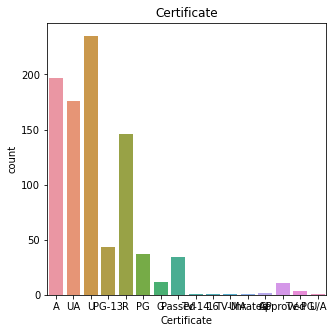

 Here, we are plotted the EDA for Rating Attribute, The EDA is distribution plot


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


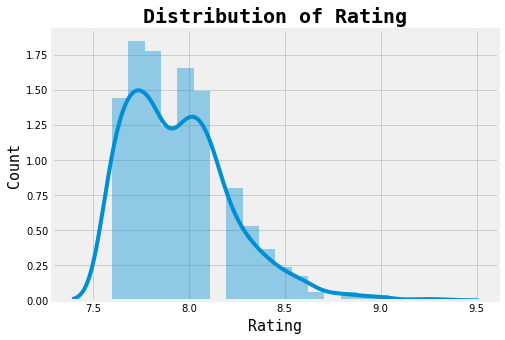

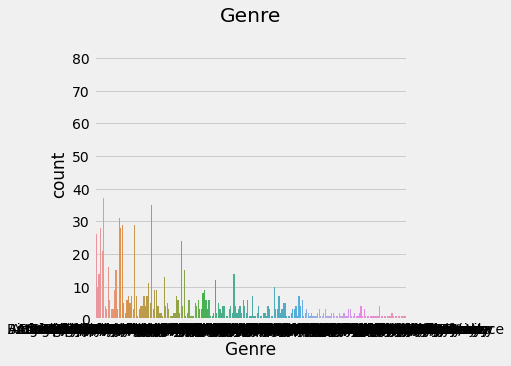

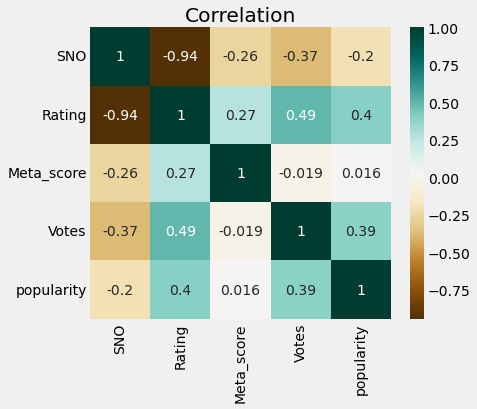

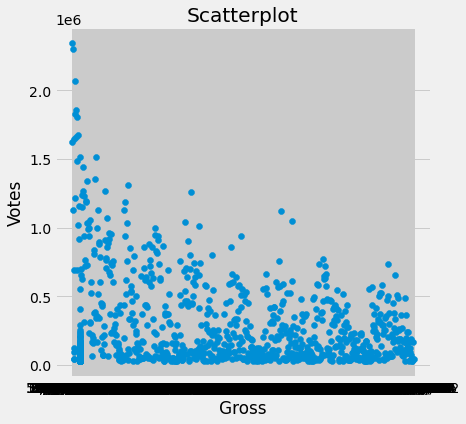

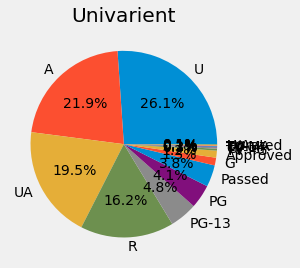

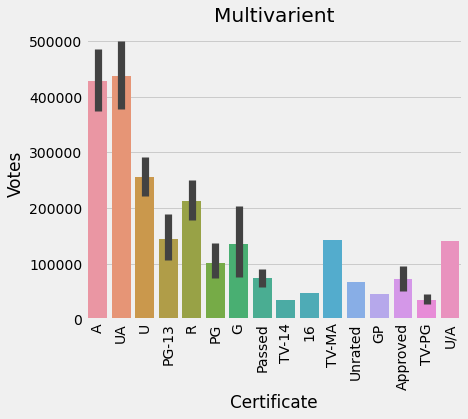

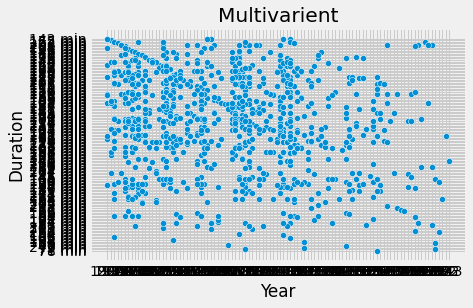

In [5]:
# ================== EDA ======================


print(" Here, we are plotted the EDA for certificate Attribute, it indicates, count of difftent kind of certificates.")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.title("Certificate")
sns.countplot(x='Certificate',data=df_merged)
plt.show()

# -------------------------------------

print(" Here, we are plotted the EDA for Rating Attribute, The EDA is distribution plot")


# Creating a distribution plot for 'Age'
age = df_merged['Rating'].value_counts()

plt.figure(figsize=(8, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df_merged['Rating'], bins=20)
plt.title('Distribution of Rating', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Rating', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

# -------------------------------------


plt.figure(figsize=(5, 5))
plt.title("Genre")
sns.countplot(x='Genre',data=df_merged)
plt.show()

# -------------------------------------


plt.figure(figsize=(6,5))
c= df_merged.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
plt.title('Correlation')
plt.show()

# -------------------------------------

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(df_merged['Gross'], df_merged['Votes'])
ax.set_xlabel('Gross')
ax.set_ylabel('Votes')
plt.title('Scatterplot')
plt.show()


# -------------------------------------

x = df_merged['Certificate'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.title('Univarient')
plt.show()


# -------------------------------------

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
sns.barplot(x=df_merged['Certificate'], y=df_merged['Votes'])
plt.xticks(rotation='90')
plt.title('Multivarient')
plt.show()

# -------------------------------------


sns.scatterplot(x=df_merged['Year'],
                y=df_merged['Duration'])
plt.title('Multivarient')
plt.show()


In [6]:
print("------------------------------------")
print("Before Checking Missing Values")
print("------------------------------------")
print()
print(df_merged.isnull().sum())

df_merged=df_merged.fillna(0)

print("------------------------------------")
print("After Checking Missing Values")
print("------------------------------------")
print()
print(df_merged.isnull().sum())

# ===== LABEL ENCODING =======


from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 

df_merged['MovieName']=label_encoder.fit_transform(df_merged['MovieName'])    


df_merged['DirectorName']=label_encoder.fit_transform(df_merged['DirectorName'])  

df_merged['Certificate']=label_encoder.fit_transform(df_merged['Certificate'].astype(str)  )

df_merged['Star1']=label_encoder.fit_transform(df_merged['Star1'])  

df_merged['Star2']=label_encoder.fit_transform(df_merged['Star2'])  

df_merged['Star3']=label_encoder.fit_transform(df_merged['Star3'])  

df_merged['Star4']=label_encoder.fit_transform(df_merged['Star4'])  

df_merged['Genre']=label_encoder.fit_transform(df_merged['Genre'])  


df_merged['Gross']=df_merged['Gross'].str.replace(',','')

df_merged['Duration']=df_merged['Duration'].str.replace('min','')

df_merged['Year']=df_merged['Year'].str.replace('PG','1978')

# df_merged['Year']=df_merged['Year'].str.replace('PG','1978')


------------------------------------
Before Checking Missing Values
------------------------------------

SNO               0
MovieName         0
Year              0
Duration          0
Rating            0
Meta_score      159
DirectorName      0
Certificate     101
Star1             0
Star2             0
Star3             0
Star4             0
Votes             0
Gross             0
popularity        0
Genre             0
dtype: int64
------------------------------------
After Checking Missing Values
------------------------------------

SNO             0
MovieName       0
Year            0
Duration        0
Rating          0
Meta_score      0
DirectorName    0
Certificate     0
Star1           0
Star2           0
Star3           0
Star4           0
Votes           0
Gross           0
popularity      0
Genre           0
dtype: int64


In [11]:
#===== DATA SPLITTING ======

from sklearn.model_selection import train_test_split

# ----------- VOTE --------------

x=df_merged.drop(['Votes','Gross'],axis=1)
y=df_merged['Votes']

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.10,random_state=1)

print("----------------------------------------------")
print(" Data Splitting")
print("----------------------------------------------")
print()

print("Total number of rows in dataset       :", df_merged.shape[0])
print()
print("Total number of rows in training data :", X_train.shape[0])
print()
print("Total number of rows in testing data :", X_test.shape[0])


# ----------- GROSS --------------

x1=df_merged.drop(['Gross'],axis=1)
y1=df_merged['Gross']

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1,y1,test_size=0.10,random_state=1)

print("----------------------------------------------")
print(" Data Splitting")
print("----------------------------------------------")
print()

print("Total number of rows in dataset       :", df_merged.shape[0])
print()
print("Total number of rows in training data :", X_train1.shape[0])
print()
print("Total number of rows in testing data :", X_test1.shape[0])


# =============== MACHINE LEARNING ============
    
# ---- LR (VOTE)


from sklearn import linear_model
from sklearn import metrics

lr = linear_model.LogisticRegression()

lr.fit(X_train, Y_train)

pred_lr=lr.predict(X_test)

acc_lr=metrics.accuracy_score(Y_test,pred_lr)*100

print("------------------------------------------------")
print("Performance Analysis (LR)")
print("------------------------------------------------")
print()
print("1. Accuracy :",acc_lr *100 )
print()
# print("Classification Report")
# print(metrics.classification_report(Y_test,pred_lr))

pred_lr=pd.DataFrame(pred_lr)    
    
pred_lr.to_csv('Votes.csv')    
 
print()
print("----------------------------------------------------------")
print()


from sklearn.tree import DecisionTreeClassifier


from sklearn import metrics

dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

pred_dt=dt.predict(X_test)

acc_dt=metrics.accuracy_score(Y_test,pred_dt)*100

print()
print("1. Accuracy :",acc_dt *100 )
print()




# ---- LR (VOTE)

from sklearn import linear_model
from sklearn import metrics

lrr = linear_model.LinearRegression()

lrr.fit(X_train1, Y_train1)

pred_lrr=lrr.predict(X_test1)

mae=metrics.mean_absolute_error(pred_lrr,Y_test1)

mse=metrics.mean_squared_error(pred_lrr,Y_test1)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        



Y_testt=pd.DataFrame(Y_test)
Y_testt.to_csv('Ressult.csv')




----------------------------------------------
 Data Splitting
----------------------------------------------

Total number of rows in dataset       : 1002

Total number of rows in training data : 901

Total number of rows in testing data : 101
----------------------------------------------
 Data Splitting
----------------------------------------------

Total number of rows in dataset       : 1002

Total number of rows in training data : 901

Total number of rows in testing data : 101


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------------------------------------------------
Performance Analysis (LR)
------------------------------------------------

1. Accuracy : 99.00990099009901


----------------------------------------------------------


1. Accuracy : 99.00990099009901

